In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

URL = "https://raw.githubusercontent.com/dongupak/DataSciPy/master/data/csv/weather.csv"
weather = pd.read_csv(URL, encoding = "cp949")

# Missing data

In [3]:
print(weather[ weather['평균풍속'].isnull()])
print(weather[ weather['평균풍속'].isna()])
print(weather[ weather['평균풍속'].isnull()] == weather[ weather['평균풍속'].isna()])
print(weather[ weather['평균풍속'].notnull()].head(5))

              일시  평균기온  최대풍속  평균풍속
559   2012-02-11  -0.7   NaN   NaN
560   2012-02-12   0.4   NaN   NaN
561   2012-02-13   4.0   NaN   NaN
1694  2015-03-22  10.1  11.6   NaN
1704  2015-04-01   7.3  12.1   NaN
3182  2019-04-18  15.7  11.7   NaN
              일시  평균기온  최대풍속  평균풍속
559   2012-02-11  -0.7   NaN   NaN
560   2012-02-12   0.4   NaN   NaN
561   2012-02-13   4.0   NaN   NaN
1694  2015-03-22  10.1  11.6   NaN
1704  2015-04-01   7.3  12.1   NaN
3182  2019-04-18  15.7  11.7   NaN
        일시  평균기온   최대풍속   평균풍속
559   True  True  False  False
560   True  True  False  False
561   True  True  False  False
1694  True  True   True  False
1704  True  True   True  False
3182  True  True   True  False
           일시  평균기온  최대풍속  평균풍속
0  2010-08-01  28.7   8.3   3.4
1  2010-08-02  25.2   8.7   3.8
2  2010-08-03  22.1   6.3   2.9
3  2010-08-04  25.3   6.6   4.2
4  2010-08-05  27.2   9.1   5.6


결측치 개수 확인
* 행방향 결측값 개수
  * df.isnull().sum() == df.isnull().sum(0)

* 열 방향 결측값 개수
  * df.isnull().sum(axis = 1)

* 열 방향 실제값 개수
  * df.notnull().sum(axis = 1)

In [4]:
print("행 방향 결측값 개수")
print(weather.isnull().sum(0))
print("-" * 40)

print("열 방향 결측값 개수")
print(weather.isnull().head(5).sum(axis = 1))
print("-" * 40)

print("열 방향 실제값 개수")
print(weather.notnull().head(5).sum(axis = 1))


행 방향 결측값 개수
일시      0
평균기온    0
최대풍속    4
평균풍속    6
dtype: int64
----------------------------------------
열 방향 결측값 개수
0    0
1    0
2    0
3    0
4    0
dtype: int64
----------------------------------------
열 방향 실제값 개수
0    4
1    4
2    4
3    4
4    4
dtype: int64


--------------------------------------------------

결측치 제거
* dropna(axis=, how=, inplace=)
* dropna() == dropna(axis = 1)
* dropna(axis = 0)



In [5]:
weather = pd.read_csv(URL, encoding = "cp949")
temp = weather.dropna(axis = 0, how = "all", inplace = False)
temp[temp['평균풍속'].isna()]

,일시,평균기온,최대풍속,평균풍속
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN
1694,2015-03-22,10.1,11.6,NaN
1704,2015-04-01,7.3,12.1,NaN
3182,2019-04-18,15.7,11.7,NaN



결측치 대체 메소드
 * df.fillna(0) : 특정 값으로 채움
 * df.fillna('') : 특정 문자열로 채움
 * df.fillna(df.mean()) : 평균으로 대체

In [6]:
weather = pd.read_csv(URL, encoding = "cp949")
weather.fillna(0, inplace = True)
weather[ weather['평균풍속'] == 0]

,일시,평균기온,최대풍속,평균풍속
559,2012-02-11,-0.7,0.0,0.0
560,2012-02-12,0.4,0.0,0.0
561,2012-02-13,4.0,0.0,0.0
1694,2015-03-22,10.1,11.6,0.0
1704,2015-04-01,7.3,12.1,0.0
3182,2019-04-18,15.7,11.7,0.0


In [7]:
weather = pd.read_csv(URL, encoding = "cp949")
# 최대풍속 열의 결측값은 최대 풍속의 평균값으로 대체
weather['최대풍속'].fillna(weather['최대풍속'].mean(), inplace = 1 < 2)

# 평균 풍속 열의 결측값은 평균 풍속의 평균값으로 대체
weather['평균풍속'].fillna(weather['평균풍속'].mean(), inplace = 1 + 1 == 2)

weather[ weather['일시'] == '2012-02-11']

,일시,평균기온,최대풍속,평균풍속
559,2012-02-11,-0.7,7.911099,3.936441


# Outlier Data

수염보다 바깥쪽 데이터가 이상치 데이터

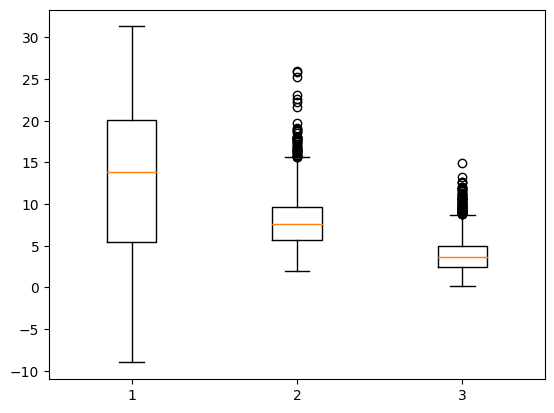

In [10]:
weather = pd.read_csv(URL, encoding = "cp949")
plt.boxplot([weather['평균기온'], weather['최대풍속'].fillna(weather['최대풍속'].mean()), weather['평균풍속'].fillna(weather['최대풍속'].mean())])
plt.show()

In [ ]:
Q1 = weather['최대풍속'].describe()['25%']
Q3 = weather['최대풍속'].describe()['75%']
IQR = Q3 - Q1
print('상자 길이 :', IQR)
print("outlier =", Q3 + 1.5 * IQR)
print(weather['최대풍속'][weather['최대풍속'] >= Q3 + 1.5 * IQR])

# 중복 데이터 처리

중복 데이터 확인
* df.duplicated( [column], keep = "first")
* keep = 'first' : default
* keep = 'last' : 마지막 값만 유지
* keep = False : 유지 x 모두 삭제

In [ ]:
data = {
    'key1' : ['a', 'b', 'b', 'c', 'c'],
    'key2' : ['v', 'w', 'w', 'x', 'y'],
    'col' : [1, 2, 3, 4, 5]
}

df = pd.DataFrame(data, columns = ['key1', 'key2', 'col'])
print(df)
print(df.duplicated(['key1']))
print('-' * 50)
print(df.duplicated(['key1', 'key2', 'col']))

df.drop_duplicates(['key1'], keep = "first") # 행 삭제